## 1. Сгенерировать 100 точек равномерно распределенных на интервале от 5 до 7

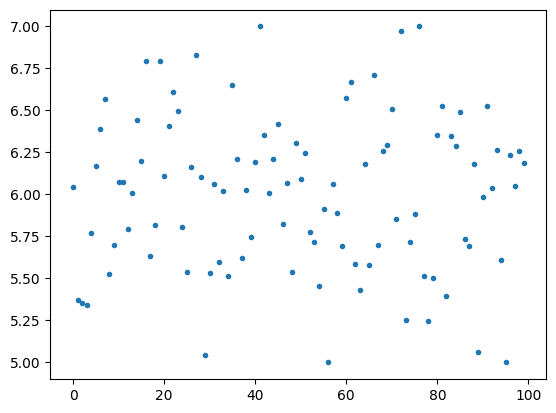

In [2]:
import numpy as np
from matplotlib import pyplot as plt
N = 100
mu, sigma = (6, 0.5)

numbers = np.random.normal(mu, sigma, N)
numbers = np.clip(numbers, 5, 7)

plt.plot(numbers, '.')

(array([ 0.,  0.,  4., 17., 23., 36., 16.,  4.,  0.,  0.]),
 array([4. , 4.4, 4.8, 5.2, 5.6, 6. , 6.4, 6.8, 7.2, 7.6, 8. ]),
 <BarContainer object of 10 artists>)

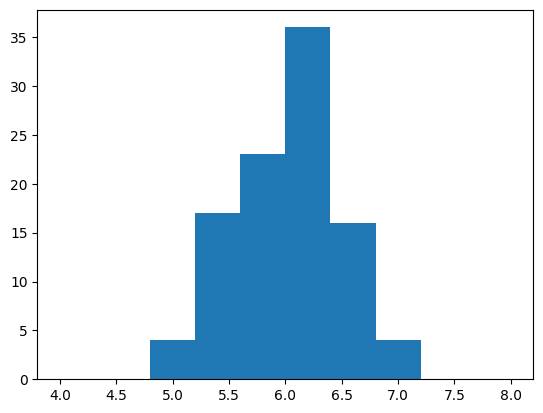

In [3]:
plt.hist(numbers, range=(4,8))

## 2. Подобрать (fit) наиболее подходящее под эту выборку нормальное распределение

In [4]:
from scipy.stats import norm
loc, scale = norm.fit(numbers)
loc, scale

(6.0042155682342955, 0.46115028152160437)

## 3. Построить гистограмму реальной выборки и ожидаемое заполнение тех же интервалов подобранным распределением

(array([ 4.,  6., 11., 15.,  8., 21., 15., 10.,  6.,  4.]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

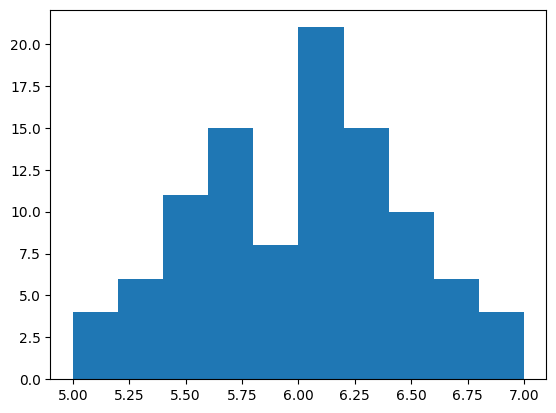

In [5]:
n_bin = 10
plt.hist(numbers, bins=n_bin)

(array([ 2.66721767,  5.61648889,  9.82716188, 14.28766163, 17.2612768 ,
        17.32877697, 14.45593663, 10.02082672,  5.77206443,  2.76258839]),
 array([5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ]),
 <BarContainer object of 10 artists>)

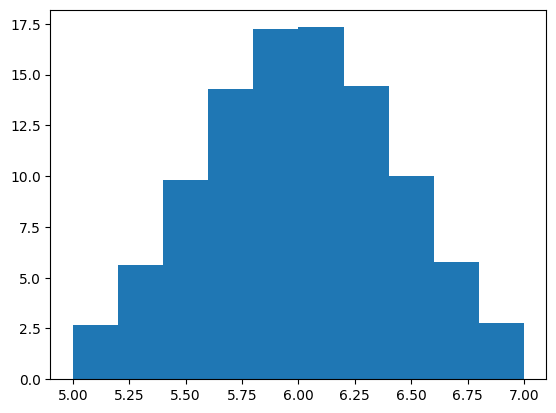

In [6]:
distribution = norm(loc, scale)
freqs, bins = np.histogram(numbers, range=(5, 7), bins=n_bin)
expected = np.diff(distribution.cdf(bins))
expected = expected/expected.sum() * N
plt.hist(x=(bins[:-1]+bins[1:])/2, bins=bins, weights=expected)

## 4. Оценить правдоподобие по критерию χ2, что данная выборка порождена этим нормальным распределением.

In [7]:
from scipy.stats import chisquare
chisquare(freqs, expected, ddof=2)

Power_divergenceResult(statistic=7.198205908793675, pvalue=0.40853879012198485)

В данном случае значение pvalue достаточно высокое, поэтому можно сказать, что данная выборка порождена этим нормальным распределением.